<Axes: >

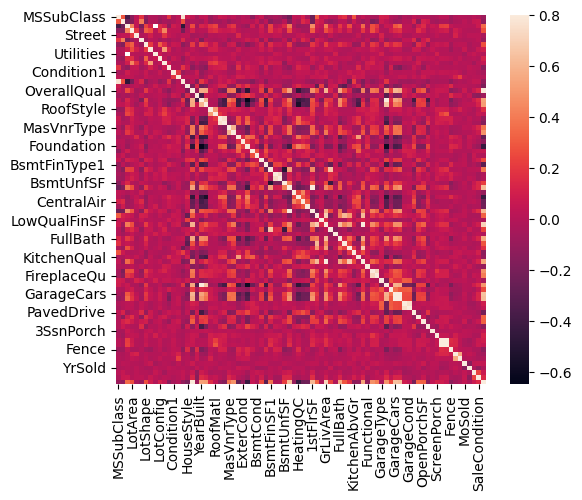

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly as pltl

train_df = pd.read_csv('data/train.csv')
train_df.drop(['Id'],axis=1,inplace=True)
for column in train_df.columns:
    if(train_df.dtypes[column] == 'object'):
        train_df[column] , unique = pd.factorize(train_df[column])
corr_mat = train_df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)

In [38]:
k = 20
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cols = cols.delete([14,17])
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'MasVnrType', 'WoodDeckSF', '2ndFlrSF'],
      dtype='object')


In [39]:
train_df.fillna(-1,inplace=True)
train_df['SalePrice'] = np.log(train_df['SalePrice'])
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
train_df.loc['TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

train_df.fillna(0,inplace=True)






Nulls = ['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']

train_df.drop(Nulls,axis=1,inplace=True)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



In [40]:
for cols in train_df.columns:
    if train_df.dtypes[cols]=='object':
        pltl.boxplot_frame(train_df,x = cols,y = 'SalePrice')
    else:
        pltl.plot(train_df,kind='scatter',x = cols,y = 'SalePrice')

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

final_data = train_df.copy()
# for i in cols:
#     final_data[i] = train_df[i]

y = final_data['SalePrice']
final_data.drop(['SalePrice'],axis = 1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.1, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse**(0.5)}")

Mean Squared Error: 0.1288427632972541


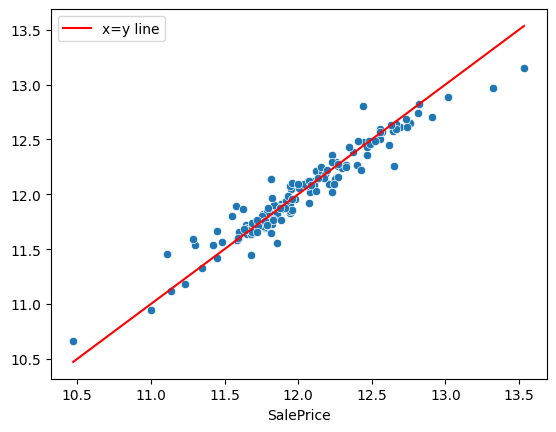

Root Mean Squared Error : 0.11976933123825671


In [42]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_val, y_train, y_val =  train_test_split(final_data,y,test_size=0.1,random_state=42)
rf_regressor = RandomForestRegressor(   n_estimators=100, 
                                        random_state=42,
                                        max_depth=20,
                                        min_samples_split=3,
                                        min_samples_leaf = 2,
                                        max_features = 30
                                    )
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_val)
mse = mean_squared_error(y_val, predictions)
# y_val = np.exp(y_val)
# predictions = np.exp(predictions)
sns.scatterplot(x=y_val, y=predictions)
min_val = min(min(y_val), min(predictions))
max_val = max(max(y_val), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', label='x=y line')

plt.legend()
plt.show()
print(f"Root Mean Squared Error : {mse**(0.5)}")
